# Tipos de variables

1. **Variables ordinales**

Las variables ordinales son aquellas que se pueden ordenar o clasificar en función de su valor. Por ejemplo, la calificación de un examen, la talla de una persona, etc.

2. **Variables nominales**

Las variables nominales son aquellas que no se pueden ordenar o clasificar en función de su valor. Por ejemplo, el color de los ojos, el sexo, etc.

3. **Variables cuantitativas**

Las variables cuantitativas son aquellas que se pueden medir o contar. Por ejemplo, la edad de una persona, el peso, la altura, etc.

4. **Variables cualitativas**

Las variables cualitativas son aquellas que no se pueden medir o contar. Por ejemplo, el color de los ojos, el sexo, etc.



# Estadística descriptiva

La estadística descriptiva es una rama de la estadística que se encarga de describir y resumir los datos de una muestra o población.

## Medidas de tendencia central

Las medidas de tendencia central son valores que representan el centro de un conjunto de datos.


### Media aritmética

La media aritmética es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total de datos.

$$
\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

### Moda

La moda es el valor que más se repite en un conjunto de datos.

### Mediana

La mediana es el valor que ocupa el lugar central de un conjunto de datos ordenados de menor a mayor.

## Medidas de dispersión

### Desviación respecto a la media aritmética

La desviación respecto a la media aritmética es la diferencia entre cada dato y la media aritmética.

$$

d_i = x_i - \bar{x}

$$

### Varianza

La varianza es la media aritmética de los cuadrados de las desviaciones respecto a la media aritmética.

$$

s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}

$$

### Desviación estándar

La desviación estándar es la raíz cuadrada de la varianza.

$$

s = \sqrt{s^2}

$$


### Covarianza

La covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.

$$

Cov(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n}

$$

### Correlación

La correlación es un valor que indica el grado de relación lineal entre dos variables aleatorias.

$$

\rho = \frac{Cov(X, Y)}{s_X s_Y}

$$

Donde:

- $X$ y $Y$ son las variables aleatorias.
- $s_X$ y $s_Y$ son las desviaciones estándar de $X$ y $Y$ respectivamente.



In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


In [2]:
mainpath = "./datasets/"
filename = "train_filtered.csv"
fullpath = os.path.join(mainpath, filename)
data_filtered = pd.read_csv (fullpath)
data_filtered.head()

,survived,age,sex,pclass,embarked
0,1,38.0,female,1,C
1,1,35.0,female,1,S
2,0,54.0,male,1,S
3,1,4.0,female,3,S
4,1,58.0,female,1,S


In [3]:
column_to_exclude = 'age'  # valor cuantitativo

# Valores ordinales
columns_to_encode = data_filtered.columns.difference([column_to_exclude])

# Crea una instancia de esta clase
encoder = OrdinalEncoder()

# Ajustar y transformar solo las columnas seleccionadas
encoded_data = encoder.fit_transform(data_filtered[columns_to_encode])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=columns_to_encode)

# Combinar las columnas codificadas con la columna excluida
data = pd.concat([encoded_df, data_filtered[column_to_exclude].reset_index(drop=True)], axis=1)
data.describe()

,embarked,pclass,sex,survived,age
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.278689,0.191257,0.519126,0.672131,35.674426
std,0.957294,0.515187,0.501005,0.470725,15.643866
min,0.000000,0.000000,0.000000,0.000000,0.920000
25%,0.000000,0.000000,0.000000,0.000000,24.000000
50%,2.000000,0.000000,1.000000,1.000000,36.000000
75%,2.000000,0.000000,1.000000,1.000000,47.500000
max,2.000000,2.000000,1.000000,1.000000,80.000000


In [4]:
# min age = 0.920000
data['age'].loc[data['age'] < 1] = 1
data.describe()

,embarked,pclass,sex,survived,age
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.278689,0.191257,0.519126,0.672131,35.674863
std,0.957294,0.515187,0.501005,0.470725,15.642891
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,24.000000
50%,2.000000,0.000000,1.000000,1.000000,36.000000
75%,2.000000,0.000000,1.000000,1.000000,47.500000
max,2.000000,2.000000,1.000000,1.000000,80.000000


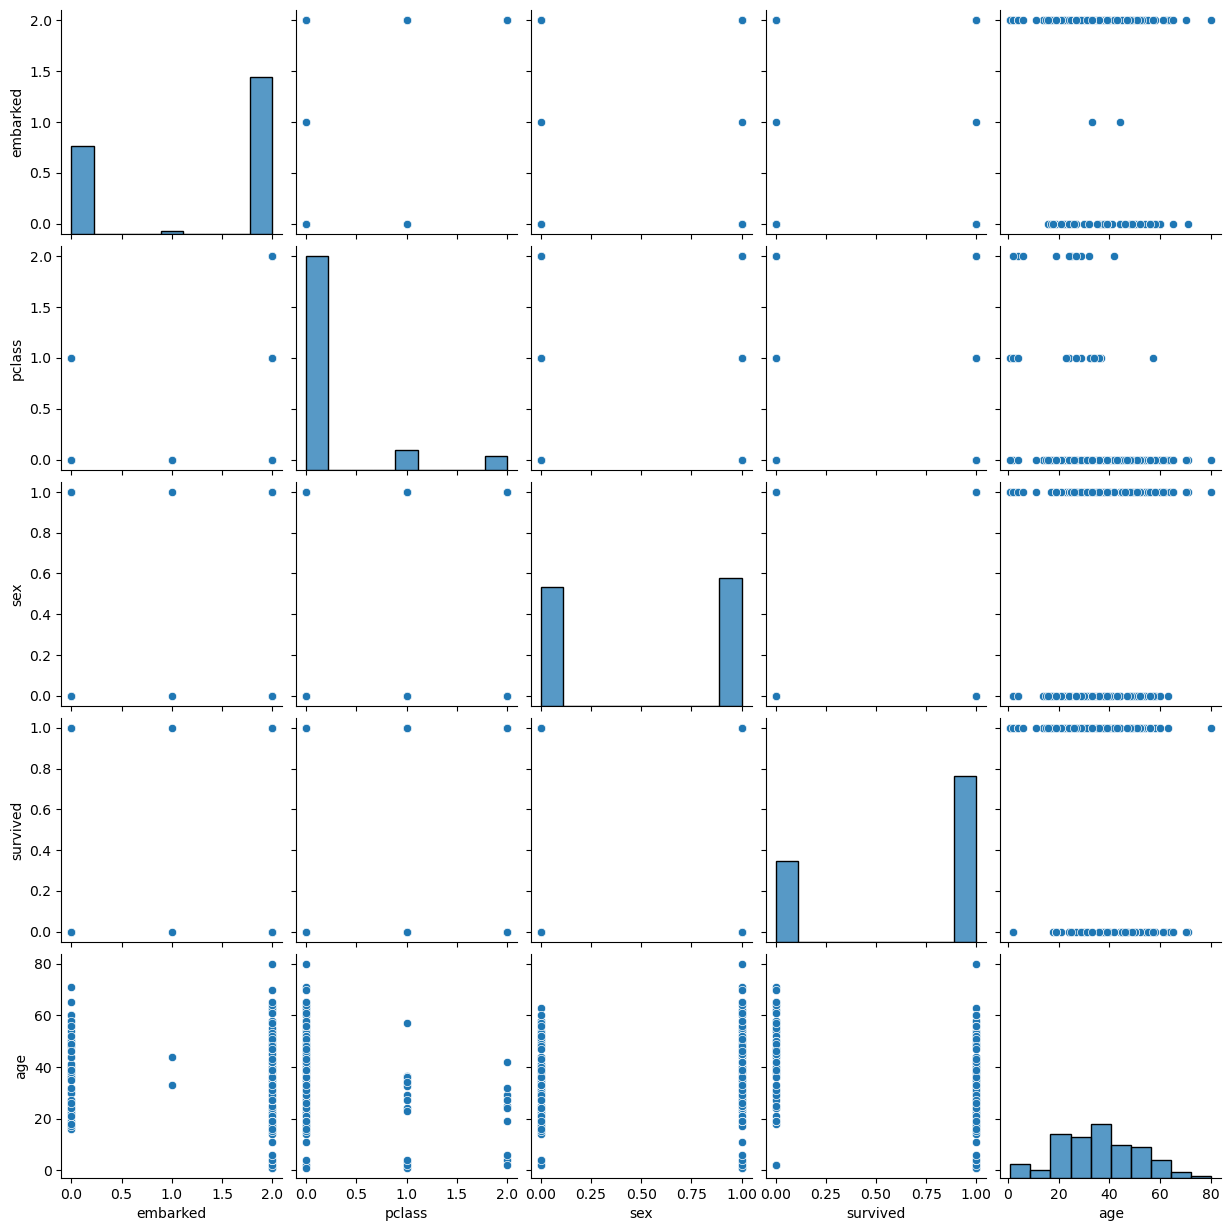

In [5]:
sns.pairplot(data)

## 1. Media aritmética:

Es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos.

$$
\mu = \bar{x}=\frac{\sum_{i=1}^{n}x_i}{n}
$$


In [6]:
valores = data['age']

In [7]:
'''Media aritmetica'''
def media(datos):
    elementos = len(datos)
    sum_numerador = sum(datos)
    #[datos[i] for i in range(elementos)])
    return round(sum_numerador/elementos,2)  

In [8]:
media_aritmetica = media(valores)
media_aritmetica


35.67

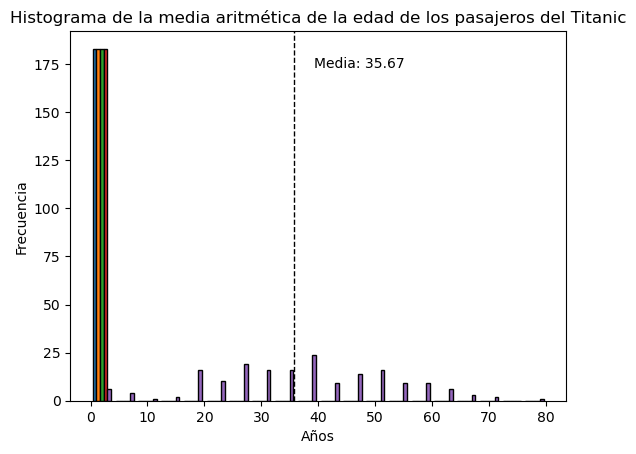

In [9]:

# Graficar el histograma

plt.hist(data, bins=20, edgecolor='black')  # Añadir borde a las barras para mejor visualización
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.title("Histograma de la media aritmética de la edad de los pasajeros del Titanic")

# Añadir una línea vertical en la media aritmética
plt.axvline(media_aritmetica, color='k', linestyle='dashed', linewidth=1)

# Obtener los límites del eje y
min_ylim, max_ylim = plt.ylim()

# Añadir texto para la media aritmética
plt.text(media_aritmetica * 1.1, max_ylim * 0.9, f'Media: {media_aritmetica:.2f}')

# Mostrar la figura
plt.show()

### 1.1. Media truncada

 El cálculo de la media después de descartar las partes extremas de la distribución normalmente descartando una cantidad igual de ambos. 

$$
\bar{x}_T=\frac{\sum_{i=p+1}^{n-p}x_i}{n-2p}
$$

con $p$ los valores extremos.

Para la mayoría de las aplicaciones estadísticas, se descartan del 5 al 25 por ciento de los extremo (cuartiles)

In [10]:
def media_truncada(datos, proportiontocut):
    """
    Calcula la media truncada de un conjunto de datos.
    
    Parameters:
    datos (list or np.array): Conjunto de datos.
    proportiontocut (float): Proporción de datos a eliminar de cada extremo (entre 0 y 0.5).
    
    Returns:
    float: La media truncada de los datos.
    """
    # Ordenar los datos
    datos_ordenados = np.sort(datos)
    
    # Calcular el número de elementos a eliminar de cada extremo
    n = len(datos)
    cortar = int(n * proportiontocut)
    
    # Eliminar los elementos de los extremos
    datos_truncados = datos_ordenados[cortar:n-cortar]
    
    # Calcular la media de los datos truncados
    media_truncada = np.mean(datos_truncados)
    
    return media_truncada, datos_truncados

In [11]:
# Calcular la media truncada (por ejemplo, eliminando el 10% de los valores más altos y más bajos)
media2, datos_truncados = media_truncada(valores, proportiontocut=0.1)
media2

35.704081632653065

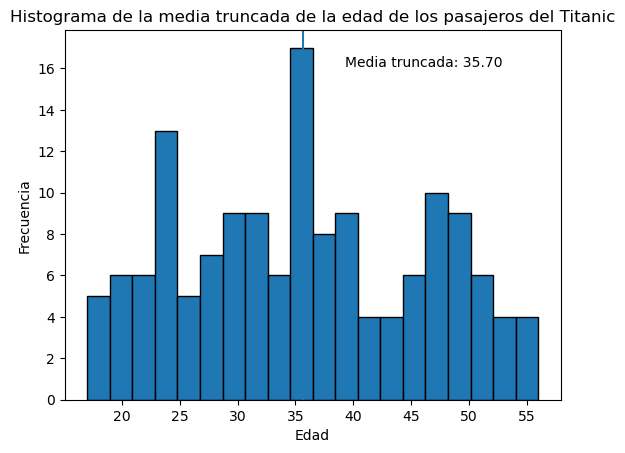

In [12]:


# Graficar el histograma
plt.hist(datos_truncados, bins=20, edgecolor='black')  # Añadir borde a las barras para mejor visualización
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de la media truncada de la edad de los pasajeros del Titanic")

# Añadir una línea vertical en la media truncada
plt.axvline(media2)

# Obtener los límites del eje y
min_ylim, max_ylim = plt.ylim()

# Añadir texto para la media truncada
plt.text(media2 * 1.1, max_ylim * 0.9, f'Media truncada: {media2:.2f}')

# Mostrar la figura
plt.show()

### 1.2 Media ponderada

Media que otorga diferentes pesos a los distintos valores sobre los que se calcula

$$
\bar{x}_w=\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}
$$

In [13]:
def media_ponderada(valores, pesos):
    """
    Calcula la media ponderada de un conjunto de valores y sus pesos correspondientes.
    
    Parameters:
    valores (list or np.array): Conjunto de valores.
    pesos (list or np.array): Conjunto de pesos correspondientes a los valores.
    
    Returns:
    float: La media ponderada de los valores.
    """
    # Verificar que la longitud de valores y pesos sea la misma
    if len(valores) != len(pesos):
        raise ValueError("La longitud de valores y pesos debe ser la misma")
    
    # Calcular la suma de los productos de valores y pesos
    suma_productos = sum(v * p for v, p in zip(valores, pesos))
    
    # Calcular la suma de los pesos
    suma_pesos = sum(pesos)
    
    # Calcular la media ponderada
    media_ponderada = suma_productos / suma_pesos
    
    return media_ponderada

In [14]:

pesos = (valores - valores.min()) / (valores.max() - valores.min())

#pesos = data['peso']  # Reemplaza 'peso' con el nombre de la columna de pesos en tu DataFrame

# Calcular la media ponderada de la columna 
media = media_ponderada(valores, pesos)
print(f"La media ponderada es: {media:.2f}")

La media ponderada es: 42.69


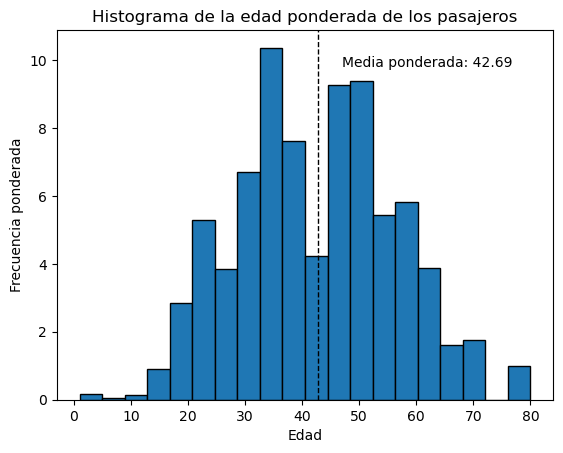

In [15]:

# Graficar el histograma de los datos ponderados
plt.hist(valores, bins=20, weights=pesos, edgecolor='black')  # Añadir borde a las barras para mejor visualización
plt.xlabel("Edad")
plt.ylabel("Frecuencia ponderada")
plt.title("Histograma de la edad ponderada de los pasajeros")

# Añadir una línea vertical en la media ponderada
plt.axvline(media, color='k', linestyle='dashed', linewidth=1)

# Obtener los límites del eje y
min_ylim, max_ylim = plt.ylim()

# Añadir texto para la media ponderada
plt.text(media * 1.1, max_ylim * 0.9, f'Media ponderada: {media:.2f}')

# Mostrar la figura
plt.show()

# 2. Moda

Es el valor que aparece con mayor frecuencia en un conjunto de datos

In [16]:
def calcular_moda(valores):
    """
    Calcula la moda de un conjunto de valores.
    
    Parameters:
    valores (list or np.array): Conjunto de valores.
    
    Returns:
    list: Lista de modas (puede haber más de una moda).
    """
    # Crear un diccionario para contar la frecuencia de cada valor
    frecuencia = {}
    for valor in valores:
        if valor in frecuencia:
            frecuencia[valor] += 1
        else:
            frecuencia[valor] = 1
    
    # Encontrar la frecuencia máxima
    max_frecuencia = max(frecuencia.values())
    
    # Encontrar todos los valores con la frecuencia máxima
    modas = [key for key, value in frecuencia.items() if value == max_frecuencia]
    
    return modas


In [17]:

moda = calcular_moda(valores)
print(f"La moda es: {moda}")

La moda es: [36.0]


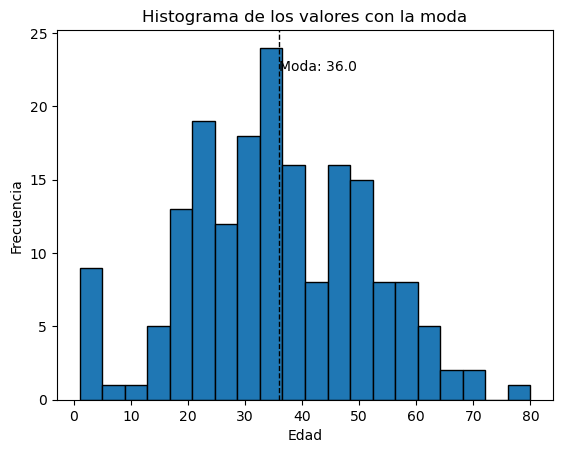

In [18]:
# Graficar el histograma de los datos
plt.hist(valores, bins=20, edgecolor='black')  # Añadir borde a las barras para mejor visualización
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de los valores con la moda")

# Añadir líneas verticales para cada moda
for m in moda:
    plt.axvline(m, color='k', linestyle='dashed', linewidth=1)

# Obtener los límites del eje y
min_ylim, max_ylim = plt.ylim()

# Añadir texto para la moda
for m in moda:
    plt.text(m, max_ylim * 0.9, f'Moda: {m}', rotation=0, verticalalignment='center')

# Mostrar la figura
plt.show()

# 3. Mediana

Es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. Se puede hallar solo para variables cuantitativas.

In [19]:
def calcular_mediana(valores):
    """
    Calcula la mediana de un conjunto de valores.
    
    Parameters:
    valores (list or np.array): Conjunto de valores.
    
    Returns:
    float: La mediana de los valores.
    """
    # Ordenar los valores
    valores_ordenados = sorted(valores)
    
    # Calcular el número de elementos
    n = len(valores_ordenados)
    
    # Encontrar la mediana
    if n % 2 == 1:
        # Si el número de elementos es impar, la mediana es el valor del medio
        mediana = valores_ordenados[n // 2]
    else:
        # Si el número de elementos es par, la mediana es el promedio de los dos valores del medio
        mediana = (valores_ordenados[n // 2 - 1] + valores_ordenados[n // 2]) / 2
    
    return mediana



In [20]:

mediana = calcular_mediana(valores)
print(f"La mediana es: {mediana}")

La mediana es: 36.0


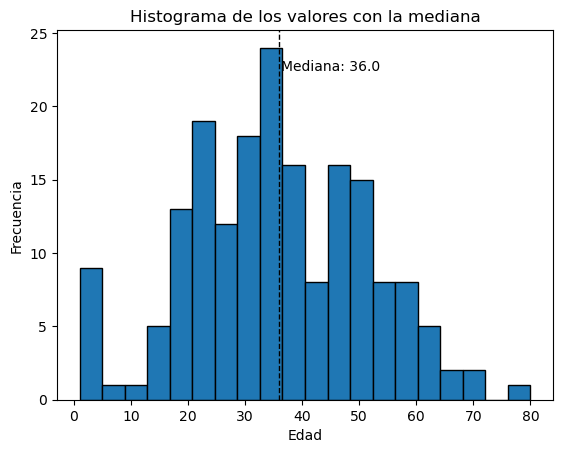

In [21]:
# Graficar el histograma de los datos
plt.hist(valores, bins=20, edgecolor='black')  # Añadir borde a las barras para mejor visualización
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de los valores con la mediana")

# Añadir una línea vertical en la mediana
plt.axvline(mediana, color='k', linestyle='dashed', linewidth=1)

# Obtener los límites del eje y
min_ylim, max_ylim = plt.ylim()

# Añadir texto para la mediana
plt.text(mediana * 1.01, max_ylim * 0.9, f'Mediana: {mediana}', rotation=0, verticalalignment='center')

# Mostrar la figura
plt.show()

## 4. Desviación respecto a la media aritmética

Es la diferencia en valor absoluto entre cada valor de la variable estadística y la media aritmética.

$$
d_i = |x_i - \bar{x}|
$$

Text(0.5, 1.0, 'Histograma de la desviacion de la media de la edad')

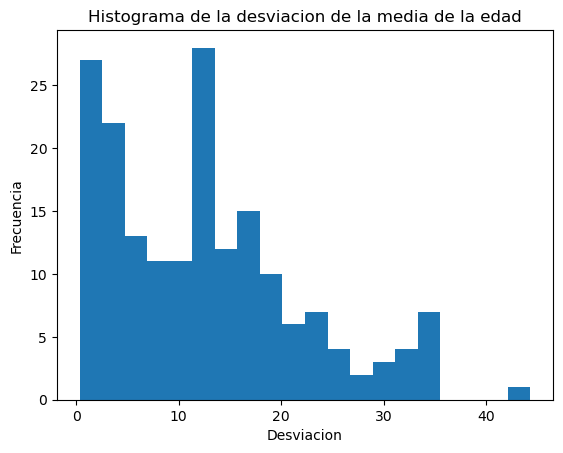

In [22]:

'''Desviacon de la media'''
desviacion = []
desviacion = [round(abs(valores - media_aritmetica),2)]
plt.hist(desviacion,bins=20) # bins=10 default
plt.xlabel("Desviacion")
plt.ylabel("Frecuencia")
plt.title("Histograma de la desviacion de la media de la edad")

## 5. Varianza

Es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística. La varianza intenta describir la dispersión de los datos.

$$
s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}
$$

In [23]:
'''Varianza'''
mu = media_aritmetica
def varianza(datos):
    columns = len(datos)
    sumatory = sum((datos-mu)*(datos-mu))
    return round(sumatory/columns,2)

varianza(valores)


243.36

# 6. Desviación estandar

Es la raíz cuadrada de la varianza.

$$
\sqrt{s^2} = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}}
$$

In [24]:
import math

def calcular_desviacion_estandar(valores):
    """
    Calcula la desviación estándar de un conjunto de valores.
    
    Parameters:
    valores (list or np.array): Conjunto de valores.
    
    Returns:
    float: La desviación estándar de los valores.
    """
    # Calcular la media aritmética
    media_aritmetica = sum(valores) / len(valores)
    
    # Calcular las desviaciones cuadráticas de la media
    desviaciones_cuadraticas = [(x - media_aritmetica) ** 2 for x in valores]
    
    # Calcular la varianza
    varianza = sum(desviaciones_cuadraticas) / len(valores)
    
    # Calcular la desviación estándar
    desviacion_estandar = math.sqrt(varianza)
    
    return desviacion_estandar

In [25]:

# Calcular la desviación estándar
desviacion_estandar = calcular_desviacion_estandar(valores)
print(f"La desviación estándar es: {desviacion_estandar}")

La desviación estándar es: 15.60009184006606


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


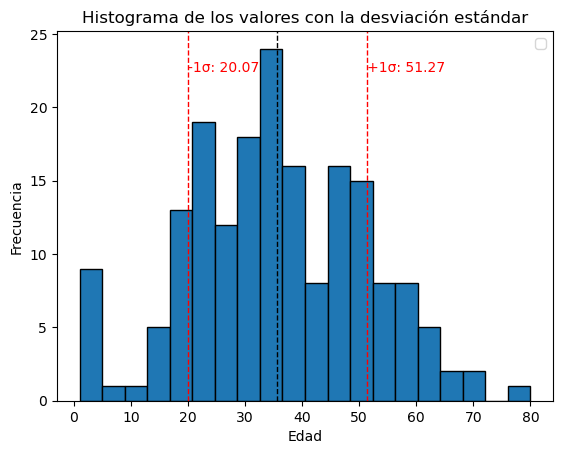

In [26]:
# Graficar el histograma de los datos
plt.hist(valores, bins=20, edgecolor='black')  # Añadir borde a las barras para mejor visualización
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de los valores con la desviación estándar")

# Añadir una línea vertical en la media
plt.axvline(media_aritmetica, color='k', linestyle='dashed', linewidth=1)

# Añadir líneas verticales para la desviación estándar
plt.axvline(media_aritmetica + desviacion_estandar, color='r', linestyle='dashed', linewidth=1)
plt.axvline(media_aritmetica - desviacion_estandar, color='r', linestyle='dashed', linewidth=1)

# Obtener los límites del eje y
min_ylim, max_ylim = plt.ylim()

# Añadir texto para la desviación estándar
plt.text(media_aritmetica + desviacion_estandar, max_ylim * 0.9, f'+1σ: {media_aritmetica + desviacion_estandar:.2f}', rotation=0, verticalalignment='center', color='r')
plt.text(media_aritmetica - desviacion_estandar, max_ylim * 0.9, f'-1σ: {media_aritmetica - desviacion_estandar:.2f}', rotation=0, verticalalignment='center', color='r')

# Añadir leyenda
plt.legend()

# Mostrar la figura
plt.show()

# 7. Covarianza

La covarianza es una medida que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.  Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias:

$$
Cov_{x, y} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{n}
$$

para dos variables $x$ y $y$.

# 8. Correlación (Pearson)

La correlación es una medida que indica el grado de relación lineal entre dos variables aleatorias. Es la covarianza de dos variables dividida por el producto de las desviaciones estándar de cada variable.

$$
\rho_{x, y} = \frac{Cov_{x, y}}{\sigma_x \sigma_y}
$$

La correlación toma valores entre -1 y 1:

1. Correlación perfecta positiva: $\rho = 1$
2. Correlación perfecta negativa: $\rho = -1$
3. No hay correlación: $\rho = 0$


## 9. Matriz de correlación:

La matriz de correlación es una matriz cuadrada que contiene los coeficientes de correlación de Pearson entre cada par de variables.

$$\Sigma =
\begin{bmatrix}
1 & \rho_{x_1, x_2} & \cdots & \rho_{x_1, x_n}\\
\rho_{x_2, x_1} & 1 & \cdots & \rho_{x_2, x_n}\\
\vdots & \vdots & \vdots & \vdots\\
\rho_{x_n, x_1} & \rho_{x_n, x_2} & \cdots & 1
\end{bmatrix}$$



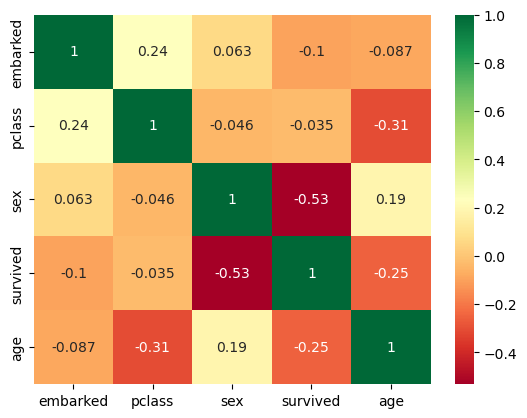

In [27]:
def titanic_corr(data): #matriz de correlación
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

titanic_corr(data)